<a href="https://colab.research.google.com/github/raghusbhat/colab/blob/main/Depth_Anything.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade git+https://github.com/huggingface/transformers.git
!pip install Pillow
!pip install numpy

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-l4w22go3
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-l4w22go3
  Resolved https://github.com/huggingface/transformers.git to commit bfe6f513b9b5d782c54b42e50891a2c7aac414a3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Load the necessary libraries
import os
HOME = os.getcwd()
from PIL import Image
import requests
from transformers import pipeline
import numpy as np

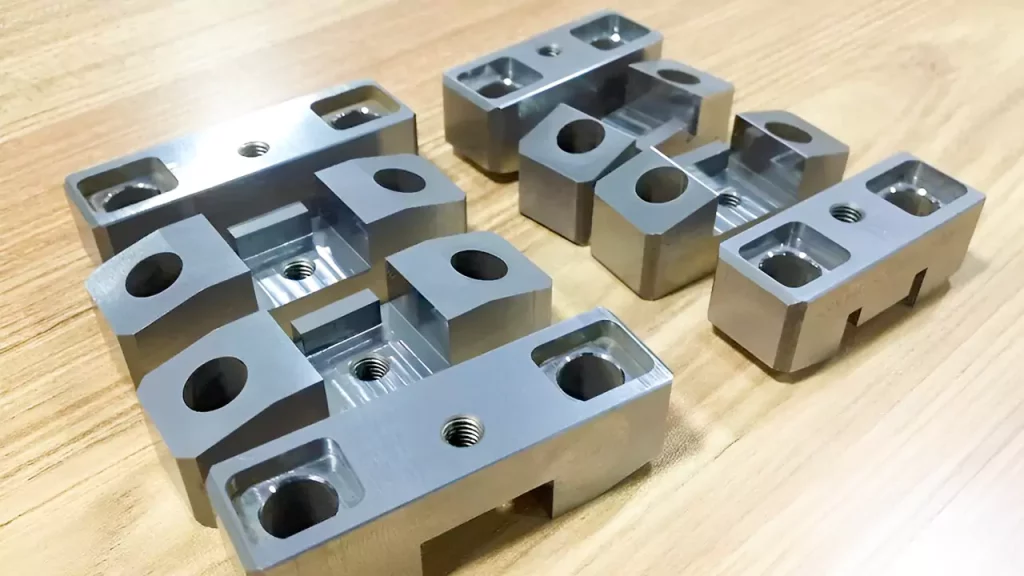

In [ ]:
# Load the image & visualize
url = 'https://prototool.com/wp-content/uploads/2023/03/Injection-Mold-Parts-Such-as-Core-Insert-Lifter-and-Slide-1024x576.webp'
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
# Load the depth estimation pipeline
pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-base-hf")

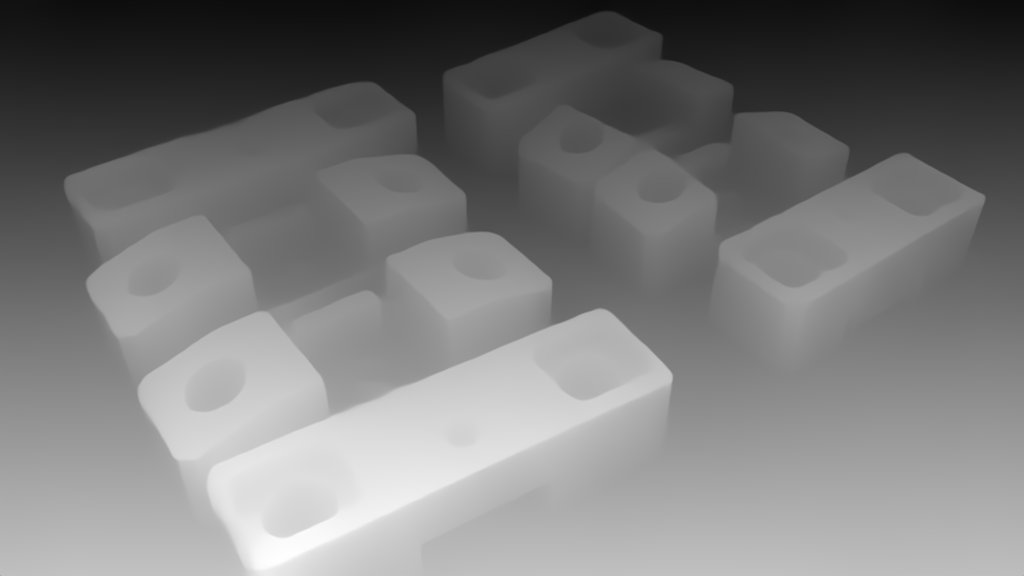

In [ ]:
# Get the depth estimation result & visualize
result = pipe(image)
depth_map = result["depth"]
depth_map

In [ ]:
# Convert the depth map to a numpy array for easier manipulation
depth_map_np = np.array(depth_map)

In [ ]:
# Get the dimensions of the depth map
height, width = depth_map_np.shape
height, width

(576, 1024)

In [ ]:
# Create arrays for x and y coordinates
y_coords, x_coords = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')
y_coords, x_coords

(array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [573, 573, 573, ..., 573, 573, 573],
        [574, 574, 574, ..., 574, 574, 574],
        [575, 575, 575, ..., 575, 575, 575]]),
 array([[   0,    1,    2, ..., 1021, 1022, 1023],
        [   0,    1,    2, ..., 1021, 1022, 1023],
        [   0,    1,    2, ..., 1021, 1022, 1023],
        ...,
        [   0,    1,    2, ..., 1021, 1022, 1023],
        [   0,    1,    2, ..., 1021, 1022, 1023],
        [   0,    1,    2, ..., 1021, 1022, 1023]]))

In [ ]:
# Flatten the arrays to create a list of coordinates
x_coords_flat = x_coords.flatten()
y_coords_flat = y_coords.flatten()
z_coords_flat = depth_map_np.flatten()
x_coords_flat, y_coords_flat, z_coords_flat

(array([   0,    1,    2, ..., 1021, 1022, 1023]),
 array([  0,   0,   0, ..., 575, 575, 575]),
 array([ 17,  17,  17, ..., 188, 186, 173], dtype=uint8))

In [ ]:
# Combine x, y, z coordinates into a single array
coordinates = np.vstack((x_coords_flat, y_coords_flat, z_coords_flat)).T
coordinates

array([[   0,    0,   17],
       [   1,    0,   17],
       [   2,    0,   17],
       ...,
       [1021,  575,  188],
       [1022,  575,  186],
       [1023,  575,  173]])

In [ ]:
# Print the first 10 coordinates as an example
for coord in coordinates[:50]:
    print(f"x: {coord[0]}, y: {coord[1]}, z: {coord[2]}")

x: 0, y: 0, z: 17
x: 1, y: 0, z: 17
x: 2, y: 0, z: 17
x: 3, y: 0, z: 17
x: 4, y: 0, z: 17
x: 5, y: 0, z: 17
x: 6, y: 0, z: 17
x: 7, y: 0, z: 17
x: 8, y: 0, z: 17
x: 9, y: 0, z: 17
x: 10, y: 0, z: 17
x: 11, y: 0, z: 17
x: 12, y: 0, z: 17
x: 13, y: 0, z: 17
x: 14, y: 0, z: 17
x: 15, y: 0, z: 17
x: 16, y: 0, z: 17
x: 17, y: 0, z: 17
x: 18, y: 0, z: 17
x: 19, y: 0, z: 17
x: 20, y: 0, z: 17
x: 21, y: 0, z: 17
x: 22, y: 0, z: 17
x: 23, y: 0, z: 17
x: 24, y: 0, z: 17
x: 25, y: 0, z: 17
x: 26, y: 0, z: 17
x: 27, y: 0, z: 17
x: 28, y: 0, z: 17
x: 29, y: 0, z: 17
x: 30, y: 0, z: 17
x: 31, y: 0, z: 17
x: 32, y: 0, z: 17
x: 33, y: 0, z: 17
x: 34, y: 0, z: 17
x: 35, y: 0, z: 17
x: 36, y: 0, z: 16
x: 37, y: 0, z: 16
x: 38, y: 0, z: 16
x: 39, y: 0, z: 16
x: 40, y: 0, z: 16
x: 41, y: 0, z: 16
x: 42, y: 0, z: 16
x: 43, y: 0, z: 16
x: 44, y: 0, z: 16
x: 45, y: 0, z: 16
x: 46, y: 0, z: 15
x: 47, y: 0, z: 15
x: 48, y: 0, z: 15
x: 49, y: 0, z: 15
